In [1]:
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
from prettytable import PrettyTable

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

In [2]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [4]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │
╞══════════════╪═══════════════════╪═══════════════╡
│            0 │                10 │            10 │
╘══════════════╧═══════════════════╧═══════════════╛


In [24]:
def plot_tof(matter, ax = None, show_x = False, show_y = False):
    if ax is None:
        ax = plt.gca()
        
    nrows = matter.output.tof_image.rows
    ncols = matter.output.tof_image.columns
    pixcal = matters[1].output.tof_image.pixcal
    
    im = ax.imshow(np.array(matter.output.tof_image.pixels).reshape(nrows, ncols), extent = [-pixcal * ncols//2, pixcal * ncols//2, -pixcal * nrows//2, pixcal * nrows//2])
    ax.grid(False)
 
    if show_x: ax.set_xlabel("x position (microns)")
    if show_y: ax.set_ylabel("y position (microns)")
    ax.set_title(f"Time of Flight: {matter.time_of_flight} ms")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(im, cax = cax, orientation='vertical')
    
def plot_it(matter, ax = None, show_x = False, show_y = False):
    if ax is None:
        ax = plt.gca()
        
    nrows = matter.output.it_plot.rows
    ncols = matter.output.it_plot.columns
    pixcal = matter.output.it_plot.pixcal
    
    im = ax.imshow(np.array(matter.output.it_plot.pixels).reshape(nrows, ncols), extent = [-pixcal * ncols//2, pixcal * ncols//2, -pixcal * nrows//2, pixcal * nrows//2])
    ax.grid(False)
    if show_x: ax.set_xlabel("x position (microns)")
    if show_y: ax.set_ylabel("y position (microns)")
    ax.set_title(f"In-trap image")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(im, cax = cax, orientation='vertical')

In [6]:
jobs = qmf.search_jobs(name="Interference w/ TOF")

In [9]:
matters = np.array([qmf.load_matter_from_job_id(job["external_id"]) for job in jobs])[3:]
[matter.get_result() for matter in matters]

[None, None, None, None, None, None, None, None]

In [26]:
tofs = [matter.time_of_flight for matter in matters]
matters = matters[np.argsort(tofs)];

In [13]:
job = qmf.search_jobs(name="Interference BEC split")
baseline = qmf.load_matter_from_job_id(job[0]["external_id"])
baseline.get_result()

In [16]:
baseline.name

'Interference BEC split'

C:\Users\saksh\AppData\Local\Temp\ipykernel_66068\3136117441.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, cax = cax, orientation='vertical')
C:\Users\saksh\AppData\Local\Temp\ipykernel_66068\3136117441.py:36: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, cax = cax, orientation='vertical')


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

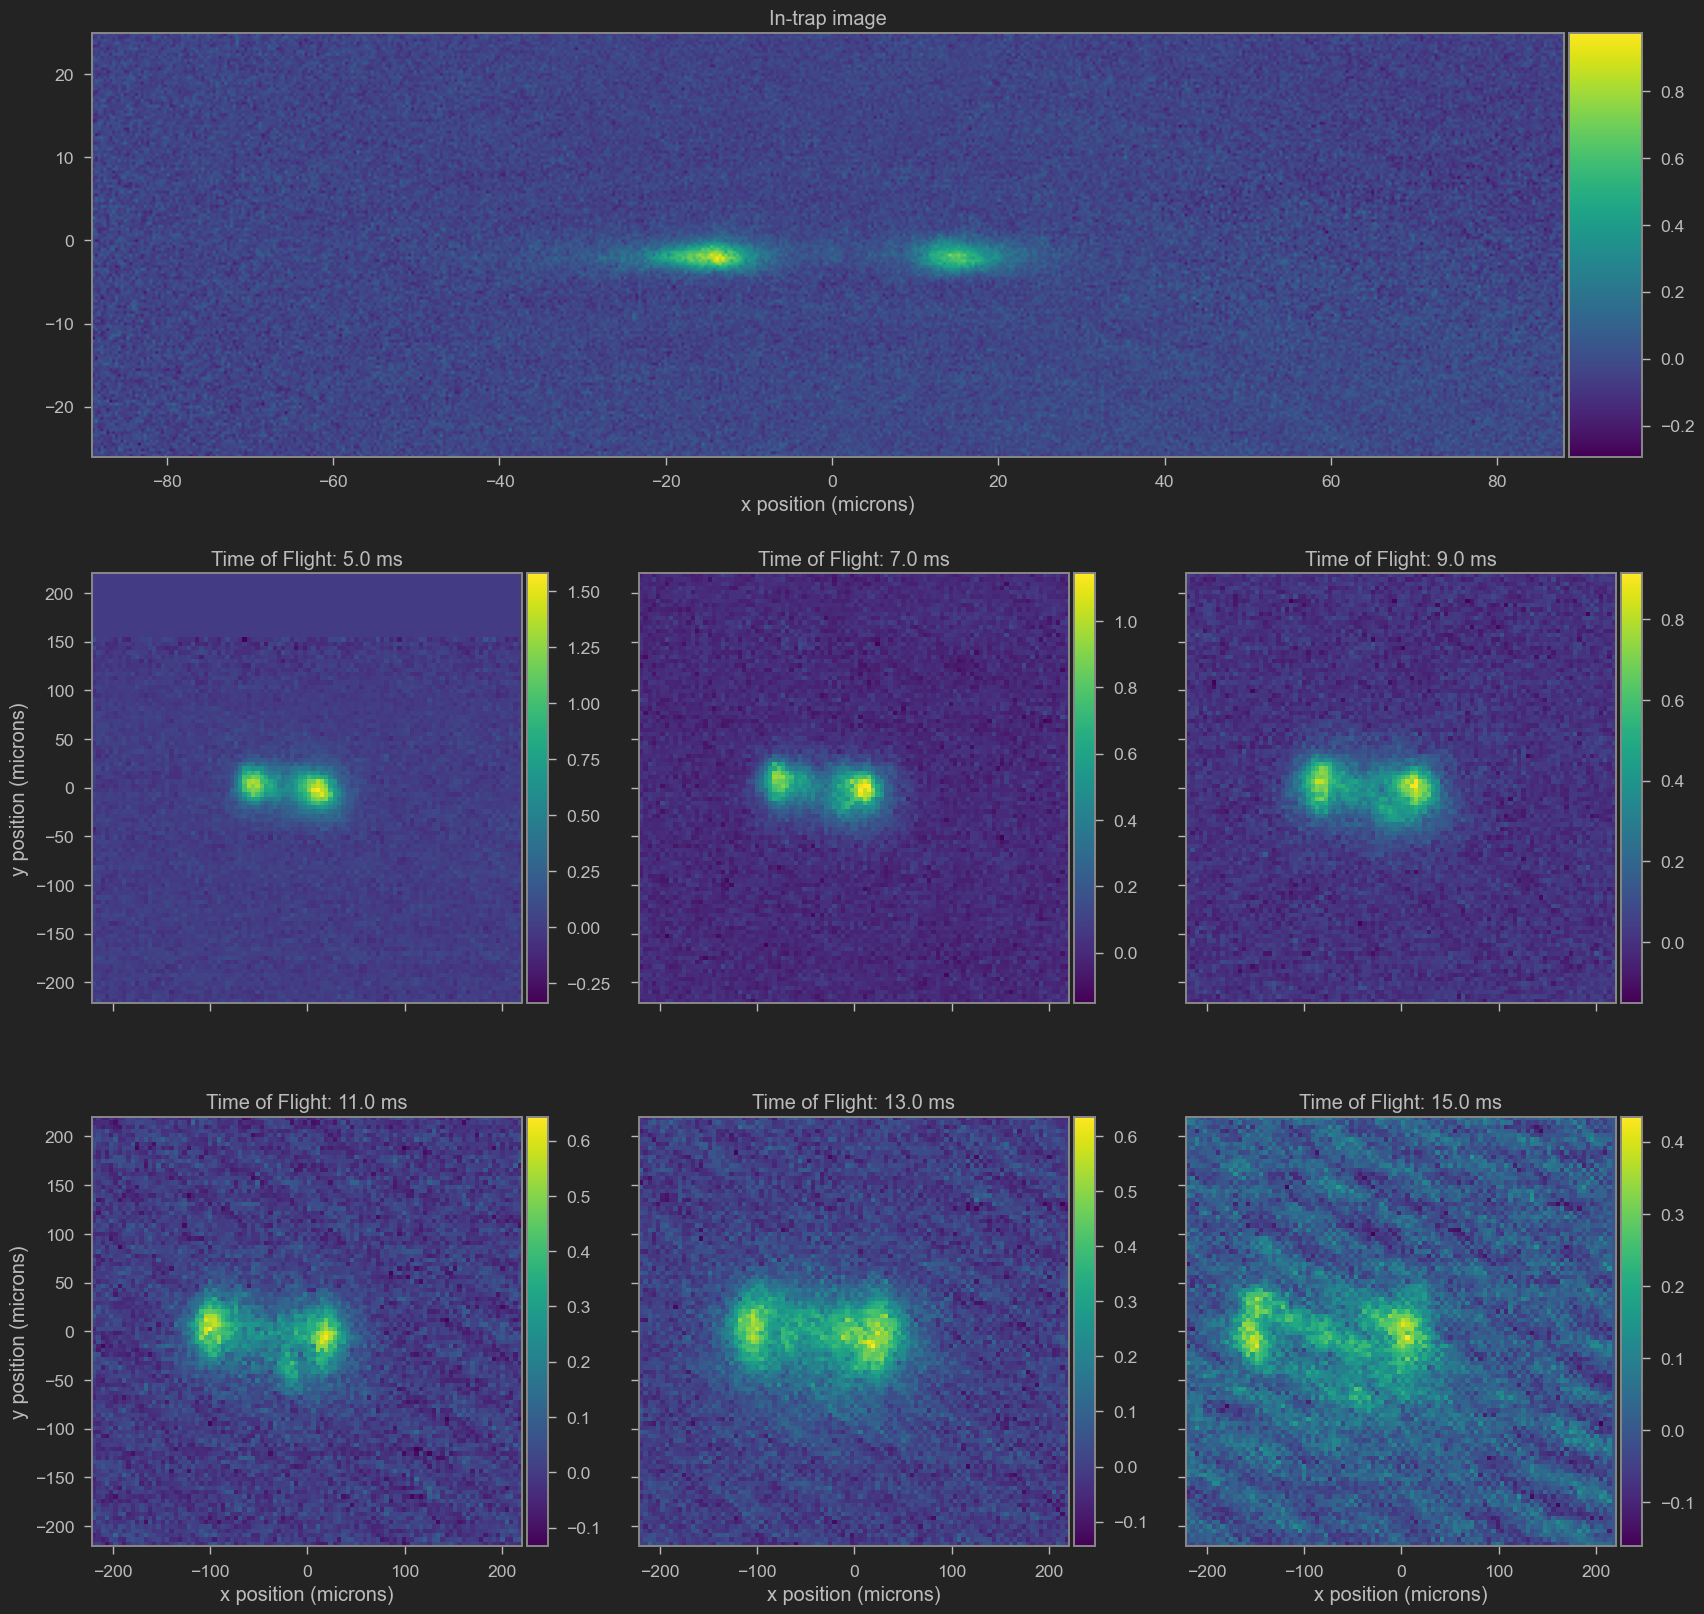

In [27]:
fig = plt.figure(layout="constrained", figsize = (20, 20))
gs = GridSpec(3, 3, figure=fig)

itax = fig.add_subplot(gs[0, :])
axes = []

for idx in range(len(matters) - 2):
    axes.append(fig.add_subplot(gs[1 + idx // 3, idx % 3]))
    if idx in [1, 2, 4, 5]: axes[-1].yaxis.set_ticklabels([])
    if idx in [0, 1, 2]: axes[-1].xaxis.set_ticklabels([])

    show_x, show_y = False, False
    if idx in [3, 4, 5]: show_x = True
    if idx in [0, 3]: show_y = True

    plot_tof(matters[idx], axes[-1], show_x, show_y)

plot_it(baseline, itax, True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)